# 機器學習_ML_KNR_KNeighborsRegressor_最近鄰居(迴歸)
###### tags: `ML` `KNR` `regressoion`
KNN除了可以應用於分類問題，也可以應用於迴歸，直觀來看，分類問題是以K個點來決定一個點的類別，而迴歸問題則是以K個值來決定一個點的值，在沒有特別設置權重的情況下取K個點的均值，但一個重要的問題是，不同於線性迴歸可以經過梯度下降學習到權重參數，KNeighborsRegressor只會在每次給定一個值之後計算。

## IMPORT
```
from sklearn.neighbors import KNeighborsRegressor
```
## CLASS
```
sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, 
            weights='uniform', algorithm='auto',
            leaf_size=30, p=2, metric='minkowski',
            metric_params=None, n_jobs=1, **kwargs)
```

## 參數說明
### n_neighbors
int, optional (default = 5)  
K值，以幾個點來決定預測點。  
### weights
str or callable, optional (default = 'uniform')  
uniform：預設置，相同權重  
distance：愈接近的權重愈高  
也可以自定義  
### algorithm
{'auto', 'ball_tree', 'kd_tree', 'brute'}, optional  
計算最近鄰居的演算法，資料量少的時候以brute即可，多一點但維度少於20的時候以kt_tree，再多一點就使用ball_tree，不過一般建議使用auto讓演算法自行決定即可。  
auto：學習的時候會自動選擇(一般選擇此項)  
brute：暴力解  
### leaf_size
int, optional (default = 30)  
葉節點的大小，不影響結果，但影響速度以及結構樹的存儲空間。  
結構樹的存儲空間需求記憶體用量為n\_samples / leaf\_size  
一般取預設值即可。  
### p
integer, optional (default = 2)  
default 2    
1_曼哈頓距離(只能直角)  
2_歐氏距離  
### metric
string or callable, default 'minkowski'  
『the distance metric to use for the tree』，樹的距離度量。  
一般來說取預設值即可，如果有其它需求的話可以參考官方[Distance metric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)
```
minkowski=sum(|x - y|^p)^(1/p)
```
### metric_params
dict, optional (default = None)  
如果有使用其它的Distance metric，相關特殊參數可由此設置。  
更多情況使用預設值即可滿足。  
### n_jobs
int, optional (default = 1)  
訓練時的cpu使用數  
設置-1則火力全開  

## 方法說明
### fit(X, y)
擬合、訓練
### get_params([deep])
取得模型參數
### kneighbors([X, n_neighbors, return_distance])
找出輸入X的鄰居與距離，如果沒有給值的話會回傳訓練模型的資料。  
每個點的最近鄰居都是自己，所以距離都為0。  
### kneighbors_graph([X, n_neighbors, mode])
回傳最近鄰居的矩陣圖，1是最近點，0非最近點。
### predict(X)
回傳預測類別
### predict_proba(X)
回傳機率
### score(X, y[, sample_weight])
取得平均精準度(mean accuracy)
### set_params(**params)
設置模型參數

## 範例
[官方範例](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py)

In [1]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
#  載入需求套件
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [ ]:
#  設置測試資料
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

In [12]:
y

array([ 0.23430296,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.71991826,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.61790585,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.84495547,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
       -0.08574159,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.43496758, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.43950071, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.62536624, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

In [13]:
#  替測試資料加一點噪點值
y[::5] += 1 * (0.5 - np.random.rand(8))

In [14]:
y

array([ 0.41887461,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.85620749,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.54770908,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.90635396,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
       -0.57411543,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.03701239, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.14837746, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.28667576, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

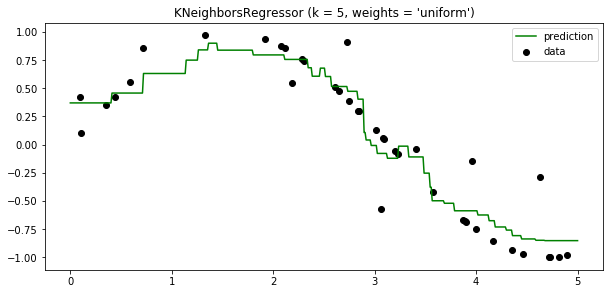

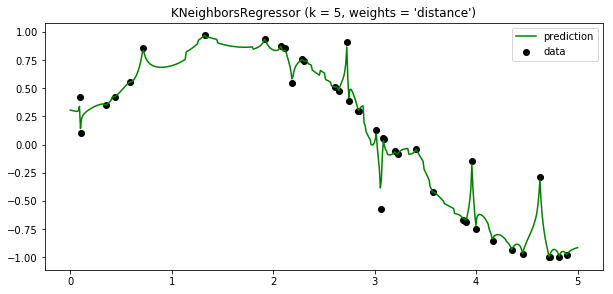

In [15]:
#  設置K值
n_neighbors = 5

#  一次畫出平均權重與距離權重兩張圖
for i, weights in enumerate(['uniform', 'distance']):
    #  實作模型
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    #  訓練模型
    y_ = knn.fit(X, y).predict(T)
    #  設置大小
    plt.figure(figsize=(10,10))
    #  設置子圖211、212
    plt.subplot(2, 1, i + 1)
    #  設置散佈圖
    plt.scatter(X, y, c='k', label='data')
    #  畫線
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()